# Exploratory Data Analysis using Python - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

## Introduction

In this project, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

There are several options for getting the dataset into Jupyter:

We'll use the `opendatasets` helper library to download the files.

In [176]:
import opendatasets as od

In [177]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


The dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [178]:
import pandas as pd

In [179]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [180]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [181]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [182]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [183]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [184]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [185]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [186]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [187]:
survey_df = survey_raw_df[selected_columns].copy()

In [188]:
schema = schema_raw[selected_columns]

Let's view some basic information about the data frame.

In [189]:
survey_df.shape

(64461, 20)

In [190]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [191]:
schema['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [192]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [193]:
schema['YearsCode']

'Including any education, how many years have you been coding in total?'

In [194]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [195]:
schema['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [196]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [197]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In summary, this line of code is transforming the 'Age1stCode' column of the survey_df DataFrame into a numeric format, handling any non-numeric or invalid entries by replacing them with NaN, thereby making the column ready for further data analysis tasks.

Let's now view some basic statistics about numeric columns.

In [198]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method, [as explained here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [199]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

survey_df.drop(survey_df[survey_df.Age1stCode < 10].index, inplace=True)


The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [200]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [201]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,41564.000000,52566.000000,51946.000000,40274.000000,37663.000000
mean,30.641317,16.189857,12.189851,8.544297,39.987798
std,9.466001,4.717071,9.145840,7.702897,10.671903
min,10.000000,10.000000,1.000000,1.000000,1.000000
25%,24.000000,13.000000,6.000000,3.000000,40.000000
50%,29.000000,16.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,16.000000,11.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [202]:
survey_df['Gender'].value_counts()

Gender
Man                                                            42072
Woman                                                           3603
Non-binary, genderqueer, or gender non-conforming                320
Man;Non-binary, genderqueer, or gender non-conforming            100
Woman;Non-binary, genderqueer, or gender non-conforming           74
Woman;Man                                                         61
Woman;Man;Non-binary, genderqueer, or gender non-conforming       22
Name: count, dtype: int64

In [203]:
import numpy as np

In [204]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

survey_df.Gender.str.contains(';', na=False): This part of the condition uses the .str.contains method to check each entry in the 'Gender' column for the presence of a semicolon (';'). The na=False parameter ensures that NaN values (missing data) are treated as not containing the semicolon, thus not meeting the condition to be replaced.
The tilde ~ at the beginning is a logical NOT operator. It inverts the condition, meaning that the condition now identifies rows where the 'Gender' column does not contain a semicolon

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [205]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
54347,India,29.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,18.0,11.0,8.0,Kotlin;Objective-C;PHP;SQL;Swift,C++;Go;Python;Scala;SQL;Swift,Every few months,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Data or business analyst;Designer;Developer, b...",10.0,Slightly dissatisfied,Flex time or a flexible schedule;Financial per...,Sometimes: 1-2 days per month but less than we...,Very important
40651,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
17101,United States,32.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,16.0,12.0,12.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby...,HTML/CSS;JavaScript;R;TypeScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Designer;Developer, back-end;Developer, front-...",60.0,Very dissatisfied,Diversity of the company or organization;Flex ...,Often: 1-2 days per week or more,Fairly important
54997,Germany,33.0,Man,NaN,"Another engineering discipline (such as civil,...",Yes,15.0,8.0,NaN,Bash/Shell/PowerShell;C;C#;C++;Java;Kotlin;Python,Assembly;JavaScript,Once a year,Meditate;Play games;Visit Stack Overflow;Watch...,Employed full-time,"Designer;Developer, game or graphics;Developer...",NaN,NaN,NaN,NaN,Not at all important/not necessary
21669,Netherlands,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,11.0,7.0,Bash/Shell/PowerShell;JavaScript;PHP;Python;SQL,Go;Python,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, QA or test",45.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Fairly important
62130,Canada,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Java;Python,C++;Java;Python,Once a year,Visit Stack Overflow,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,NaN
14284,France,24.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,17.0,7.0,2.0,HTML/CSS;JavaScript;SQL;TypeScript,Dart;HTML/CSS;JavaScript;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Critically important
31516,India,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,10.0,6.0,HTML/CSS;JavaScript;PHP;TypeScript,HTML/CSS;JavaScript;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Designer,40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Fairly important
64368,United States,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A business discipline (such as accounting, fin...",Yes,16.0,14.0,10.0,Bash/Shell/PowerShell;JavaScript;Python;SQL;VBA,Bash/Shell/PowerShell;Python;SQL;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,Data or business analyst;Data scientist or mac...,NaN,NaN,NaN,NaN,Somewhat important
25046,Belgium,21.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,13.0,8.0,NaN,Assembly;Bash/Shell/PowerShell;C#;Dart;Go;HTML...,Assembly;Bash/Shell/PowerShell;C#;Haskell;Kotl...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [206]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [207]:
schema.Country

'Where do you live?'

In [208]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [209]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         10979
India                  8169
Germany                3546
United Kingdom         3358
Canada                 1978
France                 1759
Brazil                 1737
Netherlands            1217
Poland                 1160
Spain                  1085
Australia              1042
Italy                  1034
Russian Federation      987
Pakistan                793
Sweden                  787
Name: count, dtype: int64

We can visualize this information using a bar chart.

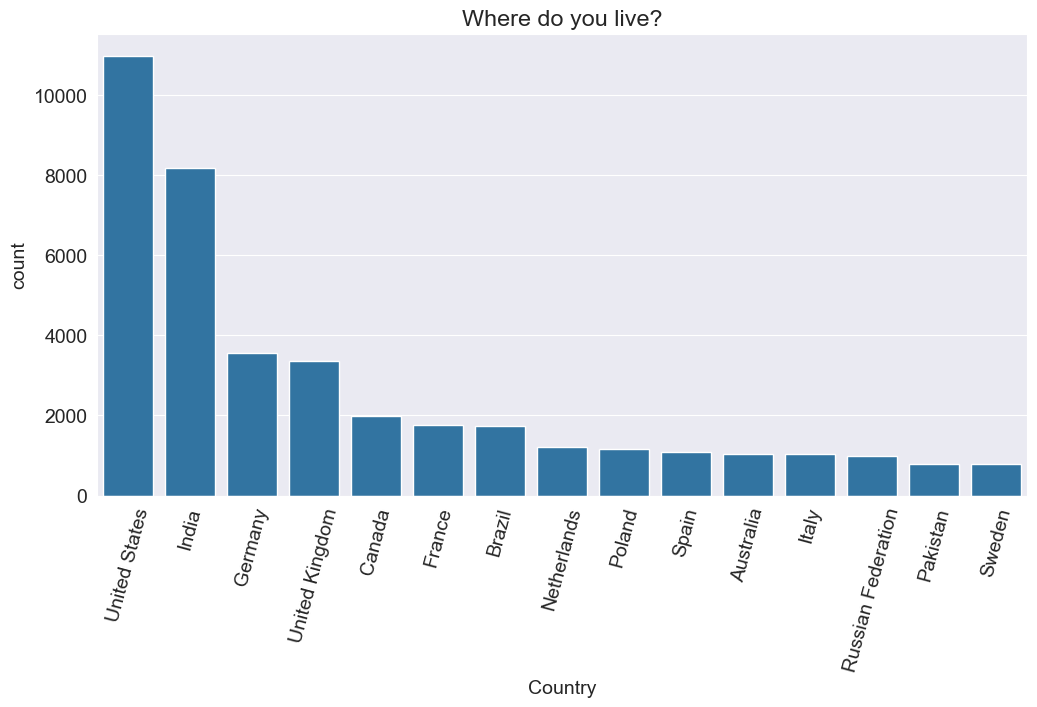

In [210]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

 Let's try finding the percentage of responses from English-speaking vs. non-English speaking countries. We can use [this list of languages spoken in different countries](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv).

In [211]:
od.download('countries-languages-spoken')

Using downloaded and verified file: .\countries-languages-spoken\countries-languages.csv


In [212]:
language_raw_df = pd.read_csv('countries-languages-spoken/countries-languages.csv',index_col='Country')
language_df = language_raw_df.where((language_raw_df['Languages Spoken'].str.contains('English', na=False)),  'Non-english', inplace=False)
language_df.where(~(language_df['Languages Spoken'].str.contains('English', na=True)),  'English', inplace=True)
language_df.rename(columns={'Languages Spoken':'Language'}, inplace=True)
language_df.sample(5)

,Language
Country,
Libya,English
Taiwan,Non-english
Botswana,English
Ethiopia,English
Mali,Non-english


In [213]:
merge_df = survey_df.merge(language_df, on='Country')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56929 entries, 0 to 56928
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 56929 non-null  object 
 1   Age                     40087 non-null  float64
 2   Gender                  44563 non-null  object 
 3   EdLevel                 50746 non-null  object 
 4   UndergradMajor          45388 non-null  object 
 5   Hobbyist                56929 non-null  object 
 6   Age1stCode              50684 non-null  float64
 7   YearsCode               50094 non-null  float64
 8   YearsCodePro            38900 non-null  float64
 9   LanguageWorkedWith      50789 non-null  object 
 10  LanguageDesireNextYear  47855 non-null  object 
 11  NEWLearn                49714 non-null  object 
 12  NEWStuck                48547 non-null  object 
 13  Employment              56602 non-null  object 
 14  DevType                 43705 non-null

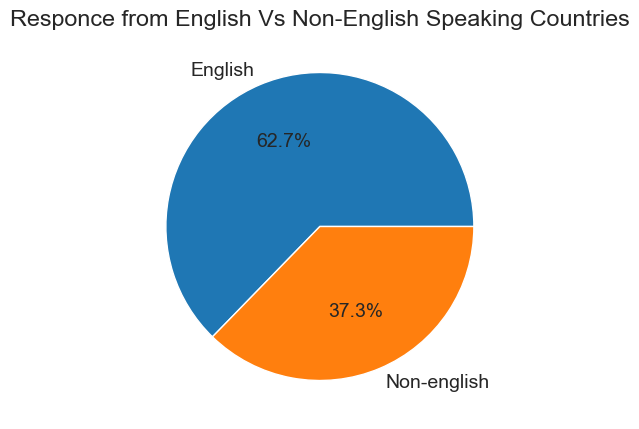

In [214]:
user_lang=merge_df.Language.value_counts()

sns.set_style('darkgrid') 
plt.pie(user_lang, labels=user_lang.index, autopct='%1.1f%%');
plt.title('Responce from English Vs Non-English Speaking Countries');

From the above chart we can see that people from the US and India are the most respondents in the survey. This is probably because the survey is in English and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

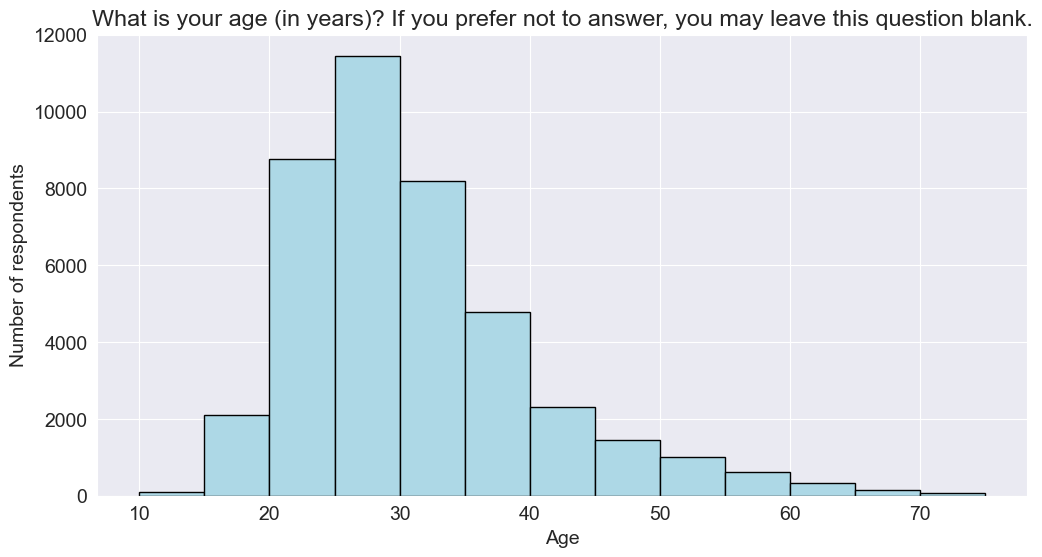

In [215]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='lightblue', edgecolor='black');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [216]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [217]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  42072
Woman                                                 3603
Non-binary, genderqueer, or gender non-conforming      320
Name: count, dtype: int64

A pie chart would be a great way to visualize the distribution.

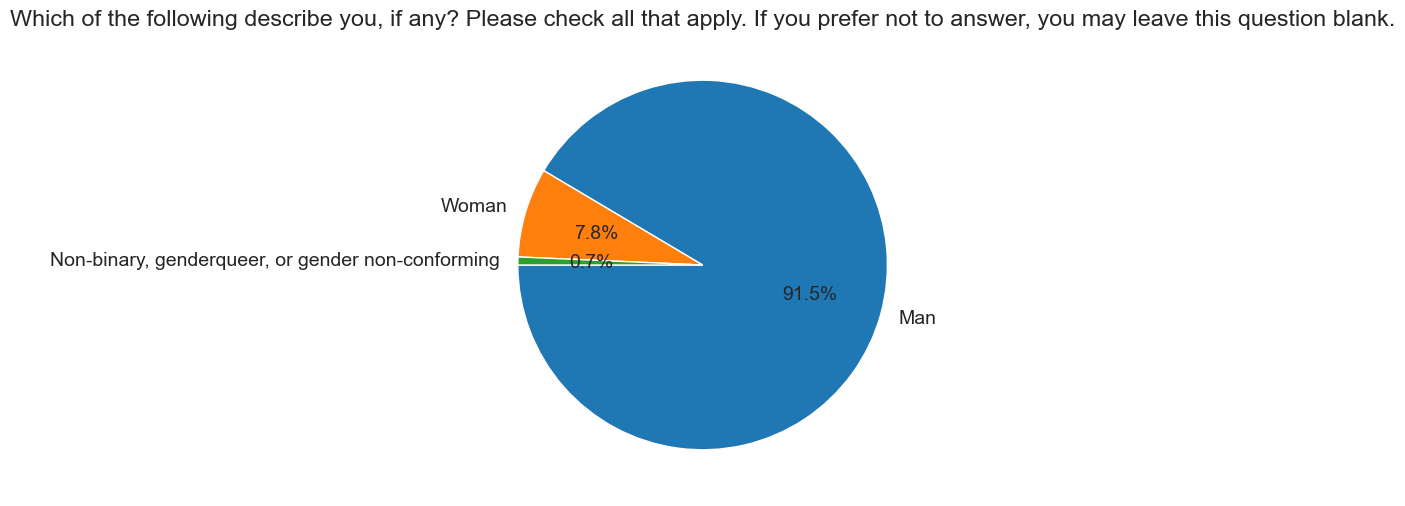

In [218]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%. 



### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

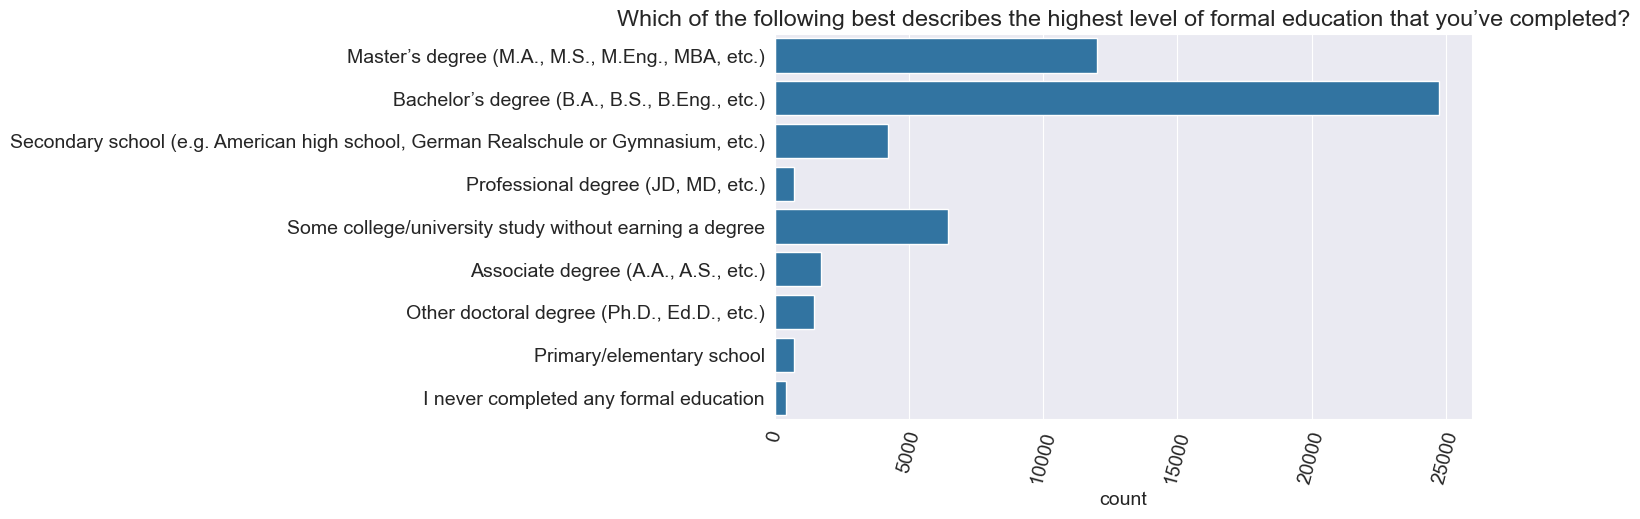

In [219]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

 

We can also checkout the representation of gender in the different education levels.

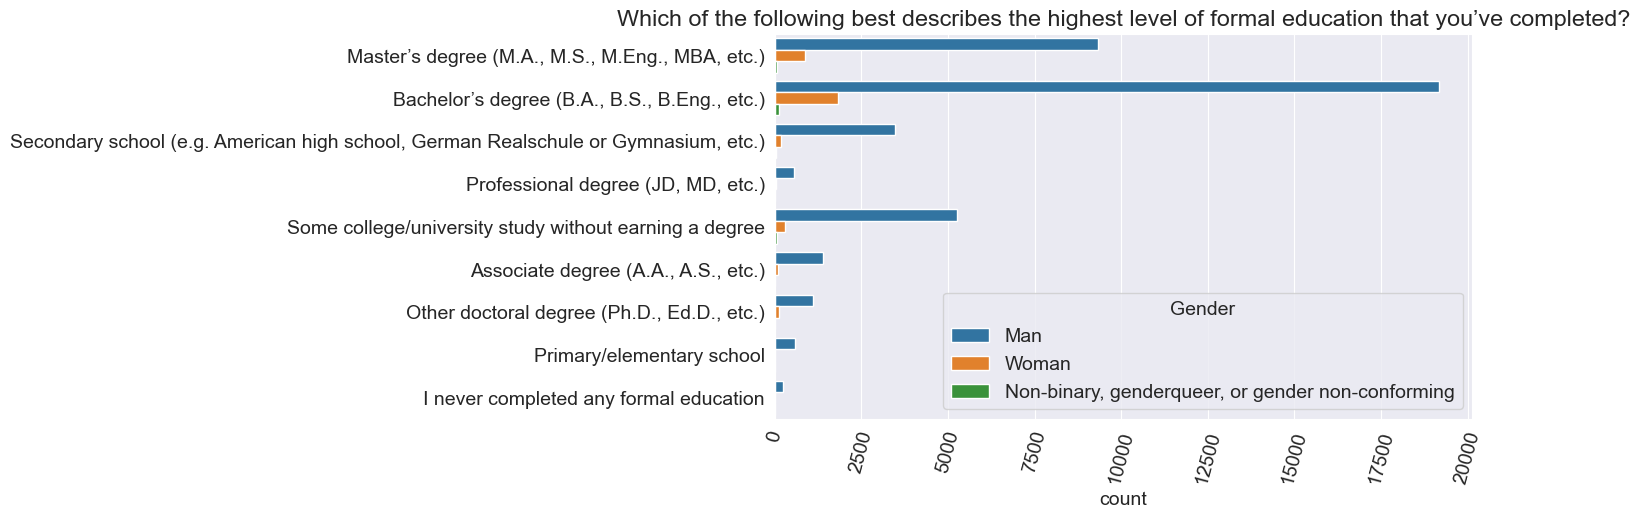

In [220]:
sns.countplot(y=survey_df.EdLevel, hue=survey_df.Gender)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [221]:
schema.UndergradMajor

'What was your primary field of study?'

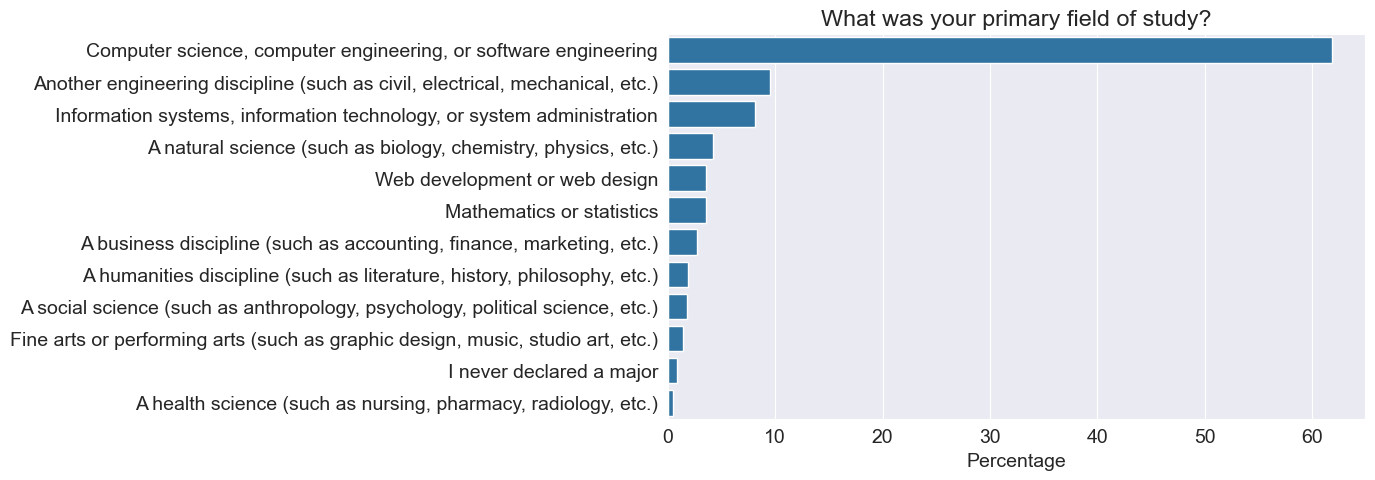

In [222]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 60% of programmers holding a college degree have a field of study other than computer science and around 80% have an engineering degree.

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.


### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [223]:
schema.Employment

'Which of the following best describes your current employment status?'

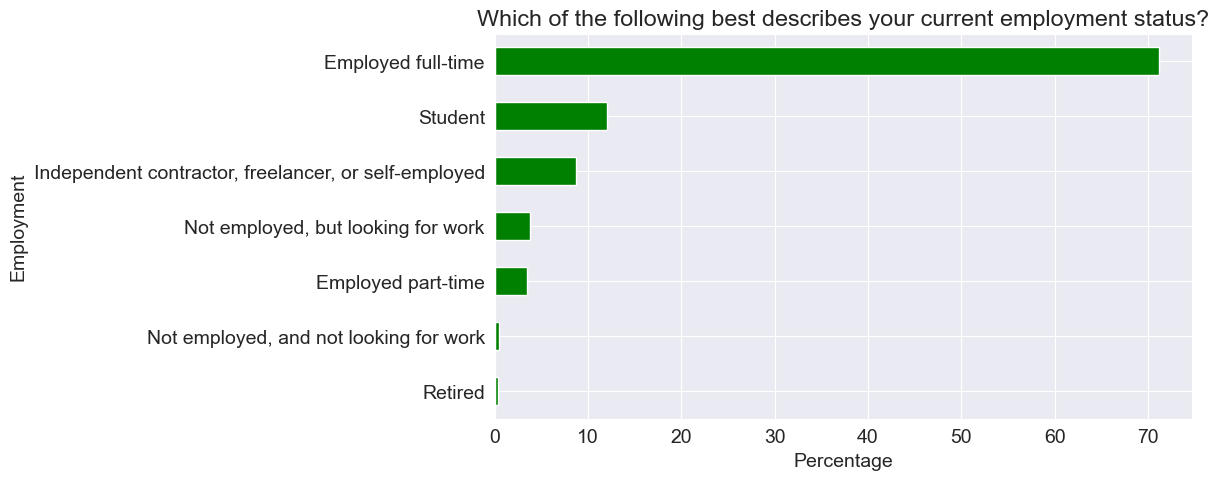

In [224]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.



The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [225]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [226]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      4143
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        2850


Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [240]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [242]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [243]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            24682
Developer, back-end                              24656
Developer, front-end                             16738
Developer, desktop or enterprise applications    10549
Developer, mobile                                 8698
DevOps specialist                                 5178
Database administrator                            5033
Designer                                          4791
System administrator                              4482
Developer, embedded applications or devices       4148
Data or business analyst                          3606
Data scientist or machine learning specialist     3567
Developer, QA or test                             3535
Engineer, data                                    3372
Academic researcher                               3178
Educator                                          2574
Developer, game or graphics                       2400
Engineering manager                               2294
Product ma

As one might expect, the most common roles include "Developer" in the name. 



## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [250]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 59546, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [251]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [252]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,Scala,C++,Kotlin,R,Go,Haskell,Rust,Dart,Assembly,Julia
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [254]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages.head(10)

JavaScript               59.511974
HTML/CSS                 55.459645
SQL                      48.187956
Python                   38.239344
Java                     35.577537
Bash/Shell/PowerShell    28.064018
C#                       27.313338
PHP                      23.051087
TypeScript               22.263460
C++                      20.678131
dtype: float64

We can plot this information using a horizontal bar chart.

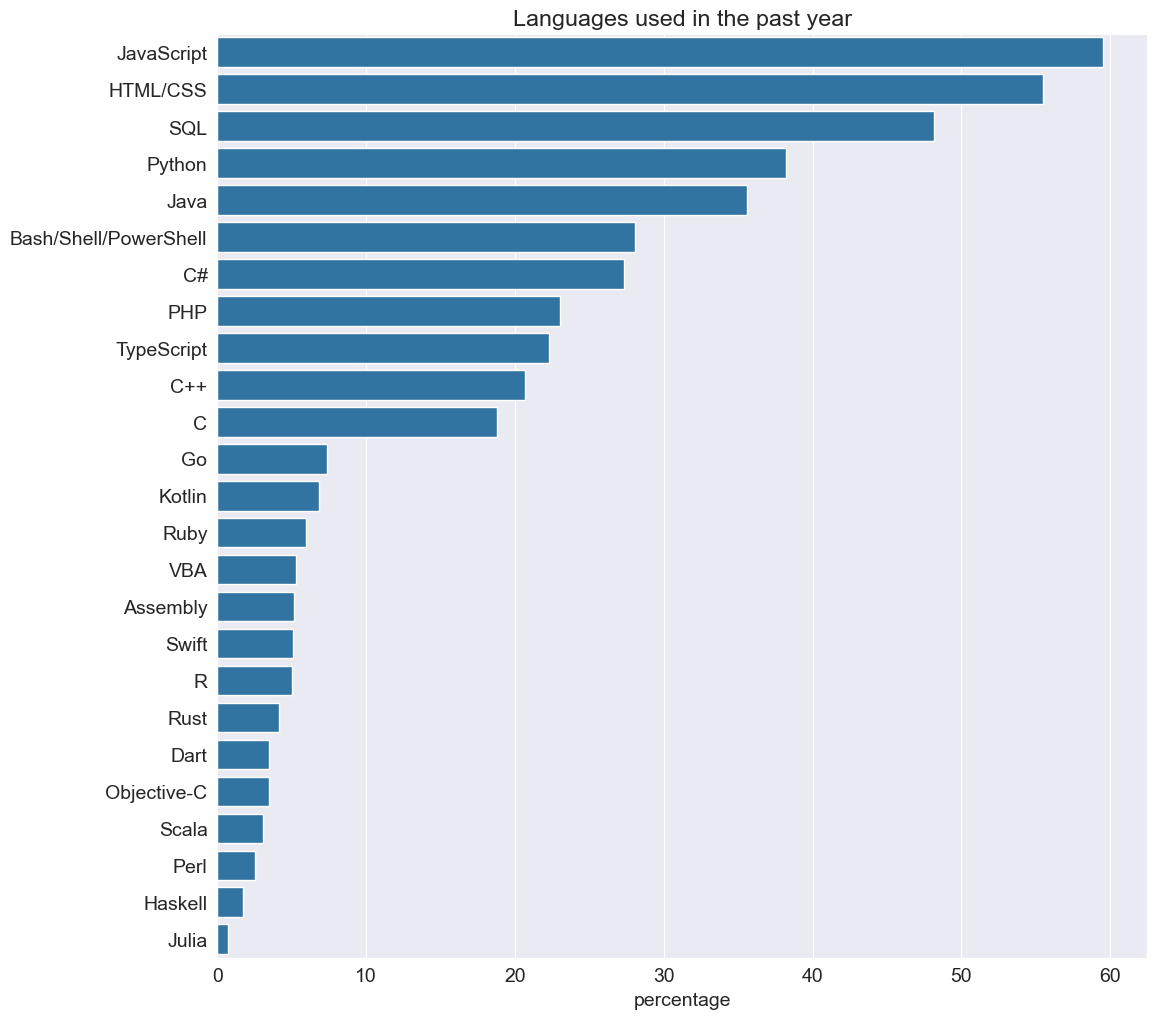

In [257]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('percentage');
plt.ylabel(None);

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [259]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages.head(10)

Python                   41.129547
JavaScript               40.390622
HTML/CSS                 31.760320
SQL                      30.625063
TypeScript               26.357774
C#                       20.600880
Java                     20.542102
Go                       19.284251
Bash/Shell/PowerShell    17.364726
Rust                     15.530850
dtype: float64

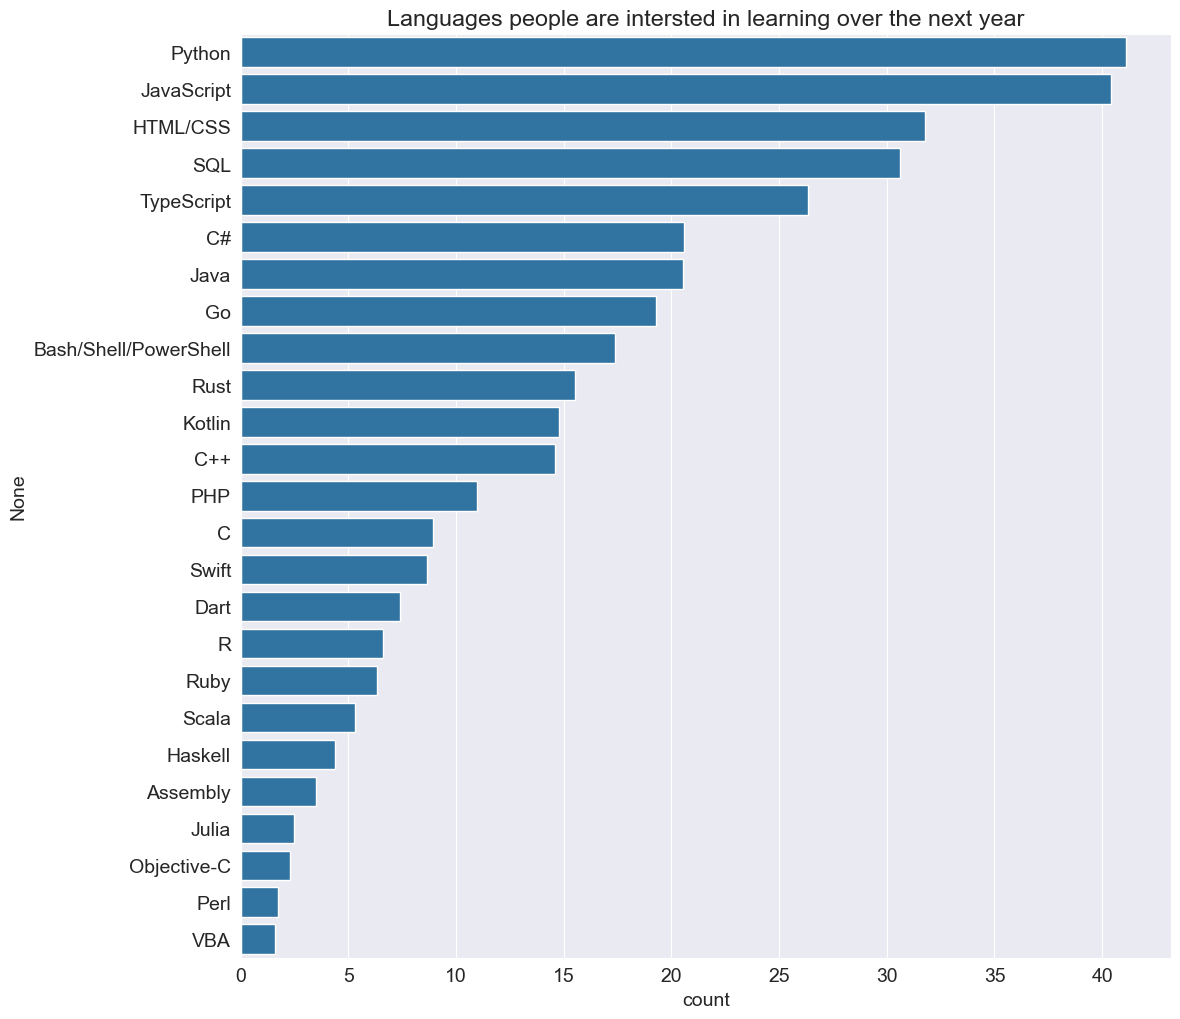

In [262]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!


#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

While this question may seem tricky at first, it's straightforward to solve using Pandas array operations. Here's what we can do:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [263]:
languages_loved_df = languages_worked_df & languages_interested_df

In [264]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

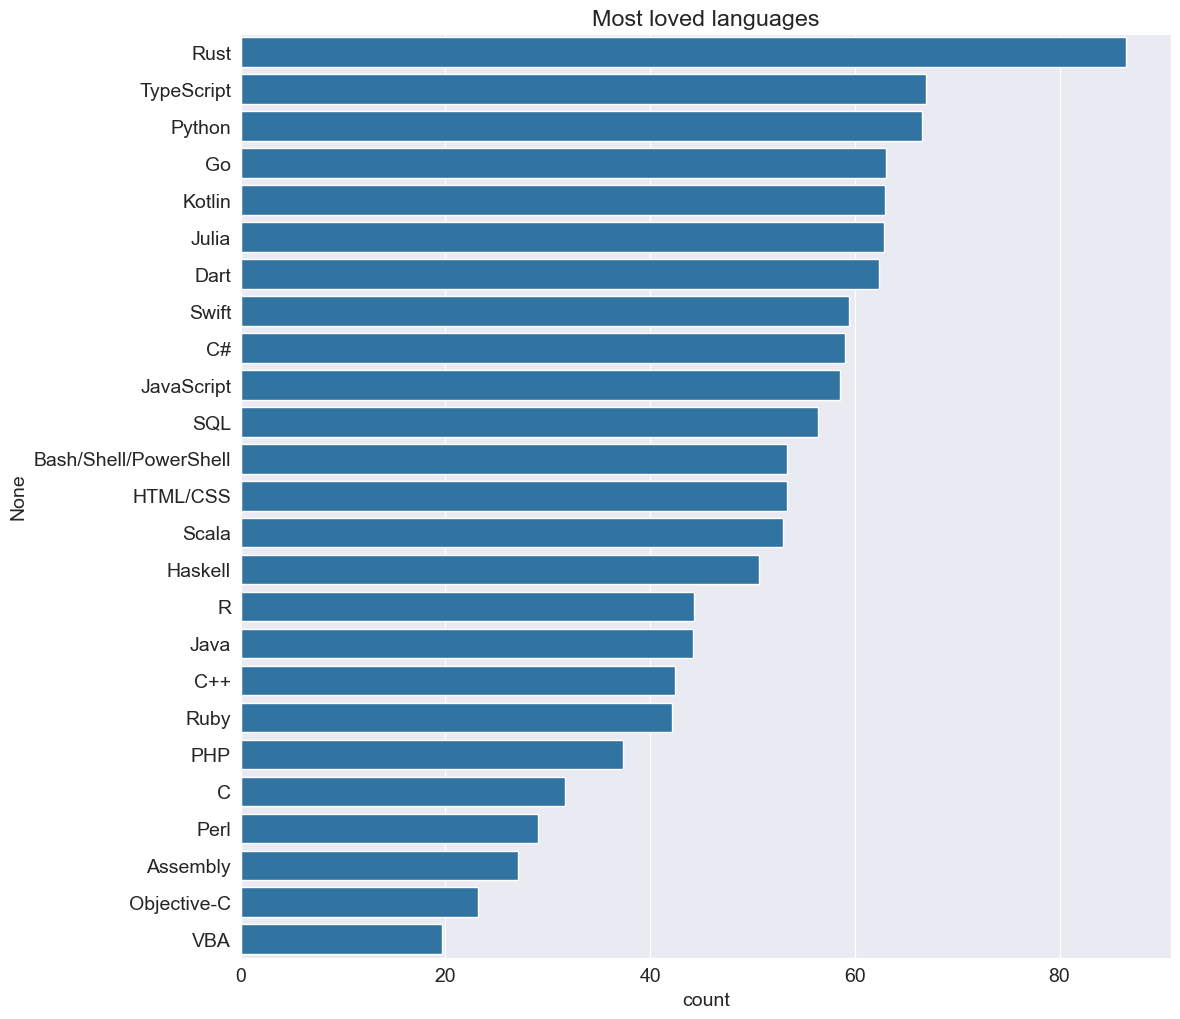

In [265]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

[Rust](https://www.rust-lang.org) has been StackOverflow's most-loved language for [four years in a row](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.


#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [266]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [268]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [269]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.774476
Israel,43.880000
China,42.234848
United States,41.754227
Viet Nam,41.408696
Sri Lanka,41.384615
Turkey,40.992991
Greece,40.976891
South Africa,40.755452


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [270]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

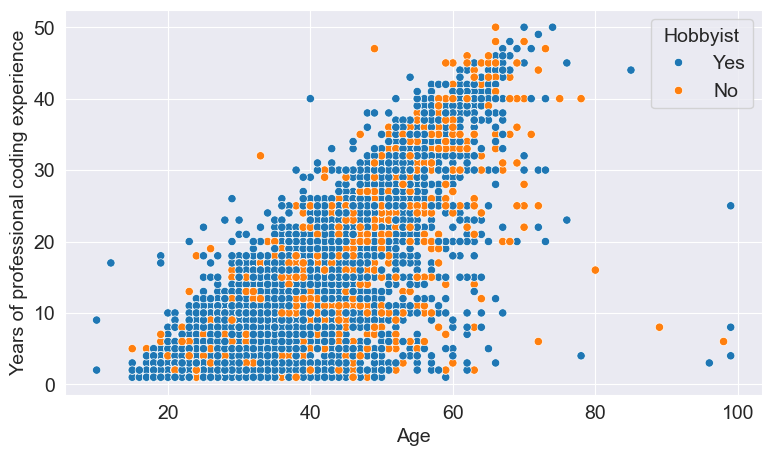

In [271]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

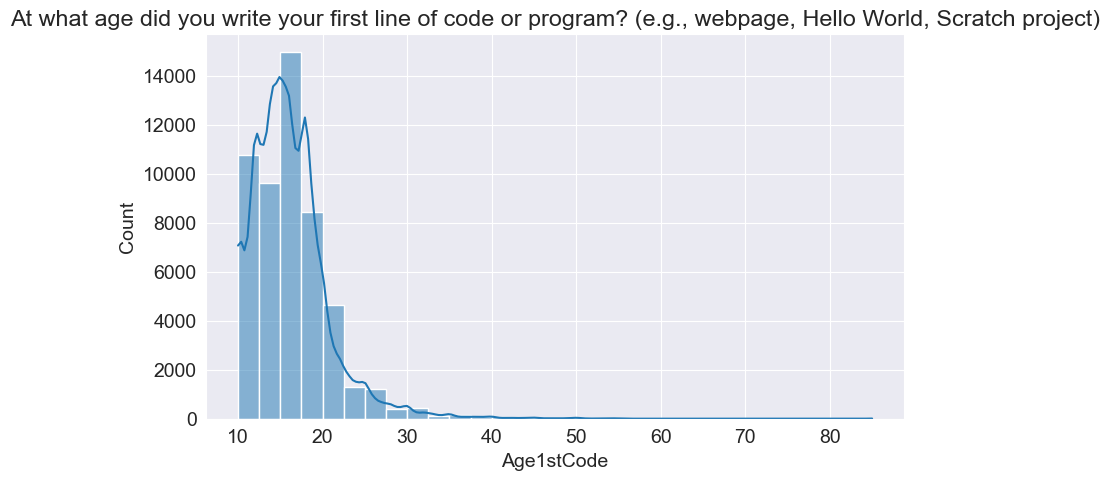

In [272]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.


## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets